Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 2.97641506e+01,  2.09873695e+01],
       [-4.24747753e+00, -1.05048418e+01],
       [-1.88142662e+01, -1.11759501e+01],
       [ 2.22976513e+01,  3.03626900e+01],
       [ 1.73852992e+00, -9.13341045e+00],
       [-9.11401844e+00, -1.16824980e+01],
       [-7.18314266e+00, -1.13112659e+01],
       [-2.71195641e+01, -1.09560461e+01],
       [ 2.35586834e+01,  2.98370991e+01],
       [ 2.21154327e+01,  2.70719757e+01],
       [-7.48745012e+00, -1.18326397e+01],
       [-6.44317818e+00, -3.84728122e+00],
       [-7.40933466e+00,  4.96774942e-01],
       [ 2.14254093e+01,  2.80373745e+01],
       [-9.20851231e+00,  8.65101755e-01],
       [ 6.97665644e+00, -8.96529102e+00],
       [ 4.76356819e-02, -6.78444767e+00],
       [-1.99967651e+01, -1.17451982e+01],
       [-1.69370003e+01, -4.91067171e+00],
       [-1.82409534e+01, -8.73804474e+00],
       [ 2.58343925e+01,  2.55089264e+01],
       [-1.82226837e-01, -3.70452142e+00],
       [-1.09841108e+01, -1.15292959e+01],
       [-6.

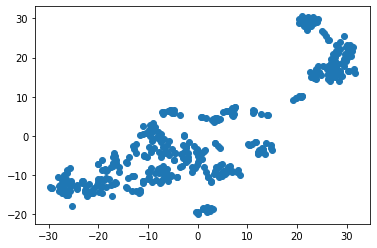

In [3]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


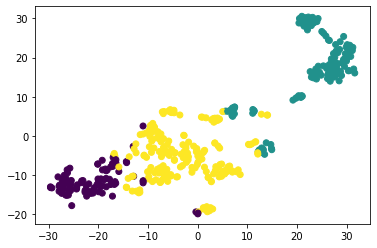

In [4]:
Kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = Kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:, 1], c=labels_train)


In [8]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

price    27.788372
dtype: float64
price    16.165354
dtype: float64
price    24.958115
dtype: float64


In [11]:
print(X_train.loc[labels_train == 0, 'CRIM'].mean())
print(X_train.loc[labels_train == 1, 'CRIM'].mean())
print(X_train.loc[labels_train == 2, 'CRIM'].mean())

0.07356558139534886
10.797028425196853
0.42166020942408367


* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [13]:
labels_test = Kmeans.fit_predict(X_test_scaled)

print(y_test[labels_test == 0].mean())
print(y_test[labels_test == 1].mean())
print(y_test[labels_test == 2].mean())

price    34.553846
dtype: float64
price    16.710526
dtype: float64
price    21.717647
dtype: float64


In [14]:
print(X_test.loc[labels_test == 0, 'CRIM'].mean())
print(X_test.loc[labels_test == 1, 'CRIM'].mean())
print(X_test.loc[labels_test == 2, 'CRIM'].mean())

0.08308461538461537
9.419181842105264
0.22250117647058823
